In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import datasets

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print("✅ Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")


✅ Libraries imported successfully!
TensorFlow version: 2.19.0
Keras version: 3.9.2


In [2]:
# Load the MNIST dataset
print("📥 Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print("✅ MNIST dataset loaded successfully!")
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Data type: {x_train.dtype}")
print(f"Pixel value range: {x_train.min()} - {x_train.max()}")
print(f"Number of classes: {len(np.unique(y_train))}")


📥 Loading MNIST dataset...
✅ MNIST dataset loaded successfully!
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Data type: uint8
Pixel value range: 0 - 255
Number of classes: 10


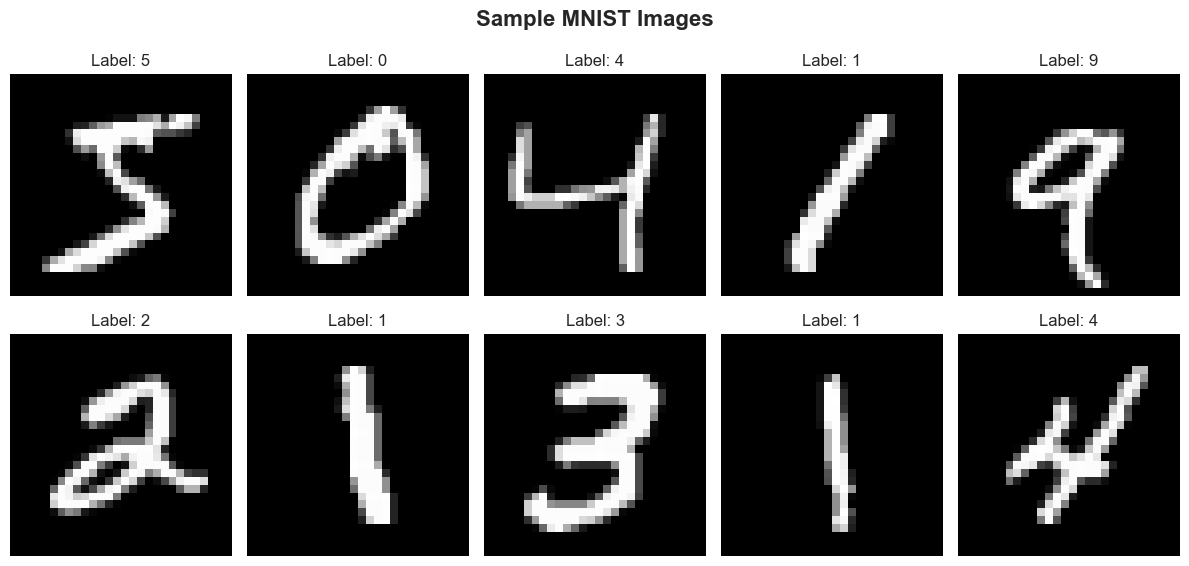

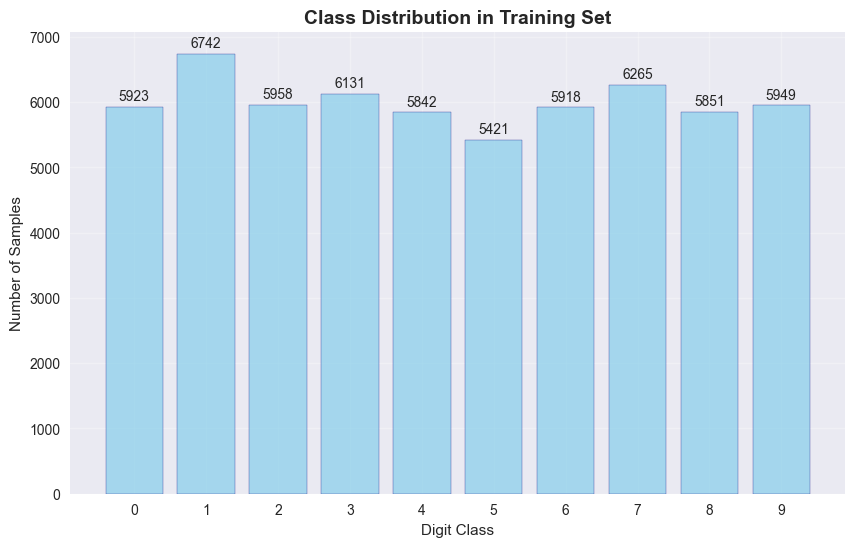

✅ Sample images and class distribution visualized!


In [3]:
# Visualize sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Sample MNIST Images', fontsize=16, fontweight='bold')

for i in range(10):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(x_train[i], cmap='gray')
    axes[row, col].set_title(f'Label: {y_train[i]}', fontsize=12)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Show class distribution
plt.figure(figsize=(10, 6))
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts, color='skyblue', edgecolor='navy', alpha=0.7)
plt.title('Class Distribution in Training Set', fontsize=14, fontweight='bold')
plt.xlabel('Digit Class')
plt.ylabel('Number of Samples')
plt.xticks(unique)
plt.grid(True, alpha=0.3)
for i, count in enumerate(counts):
    plt.text(i, count + 100, str(count), ha='center', fontsize=10)
plt.show()

print("✅ Sample images and class distribution visualized!")


In [4]:
# 1. Normalize pixel values to [0, 1] range
print("🔄 Preprocessing data...")

x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

print(f"✅ Data normalized. New range: {x_train_normalized.min()} - {x_train_normalized.max()}")

# 2. Reshape data for different neural network architectures
# For feedforward networks: flatten to 1D
x_train_flat = x_train_normalized.reshape(x_train_normalized.shape[0], -1)
x_test_flat = x_test_normalized.reshape(x_test_normalized.shape[0], -1)

print(f"Flattened shape: {x_train_flat.shape}")

# For convolutional networks: add channel dimension
x_train_cnn = x_train_normalized.reshape(x_train_normalized.shape[0], 28, 28, 1)
x_test_cnn = x_test_normalized.reshape(x_test_normalized.shape[0], 28, 28, 1)

print(f"CNN-ready shape: {x_train_cnn.shape}")

# 3. One-hot encode labels
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)

print(f"One-hot encoded labels shape: {y_train_onehot.shape}")
print(f"Original label: {y_train[0]}")
print(f"One-hot label: {y_train_onehot[0]}")

print("✅ Data preprocessing completed!")


🔄 Preprocessing data...
✅ Data normalized. New range: 0.0 - 1.0
Flattened shape: (60000, 784)
CNN-ready shape: (60000, 28, 28, 1)
One-hot encoded labels shape: (60000, 10)
Original label: 5
One-hot label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
✅ Data preprocessing completed!


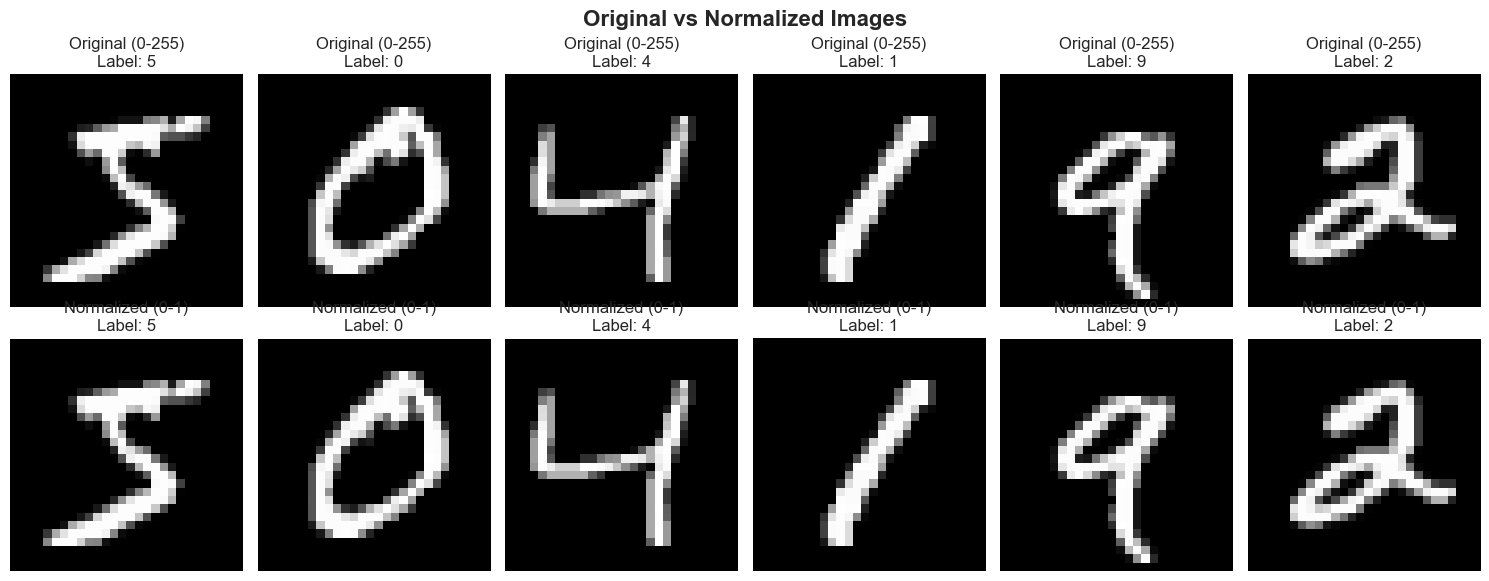

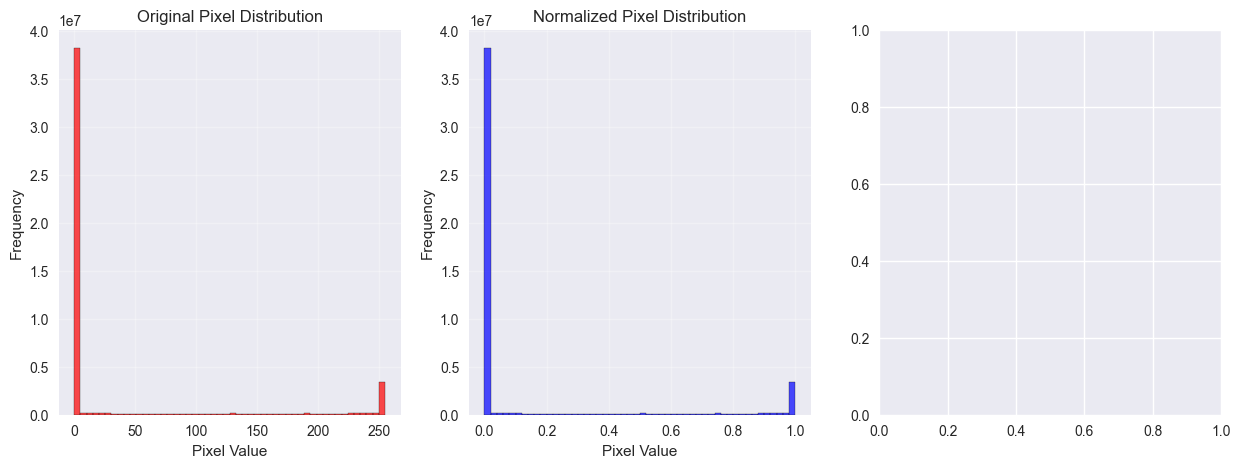

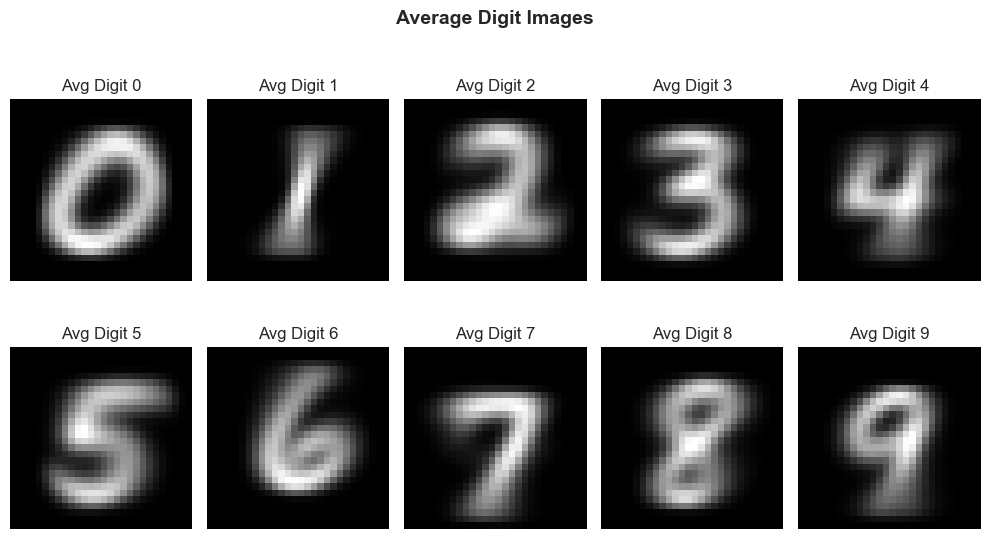

✅ Data analysis and visualization completed!


In [5]:
# Compare original vs normalized images
fig, axes = plt.subplots(2, 6, figsize=(15, 6))

for i in range(6):
    # Original image
    axes[0, i].imshow(x_train[i], cmap='gray', vmin=0, vmax=255)
    axes[0, i].set_title(f'Original (0-255)\nLabel: {y_train[i]}')
    axes[0, i].axis('off')
    
    # Normalized image
    axes[1, i].imshow(x_train_normalized[i], cmap='gray', vmin=0, vmax=1)
    axes[1, i].set_title(f'Normalized (0-1)\nLabel: {y_train[i]}')
    axes[1, i].axis('off')

plt.suptitle('Original vs Normalized Images', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Analyze pixel intensity distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(x_train.flatten(), bins=50, alpha=0.7, color='red', edgecolor='black')
plt.title('Original Pixel Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(x_train_normalized.flatten(), bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Normalized Pixel Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
# Show average digit for each class
avg_digits = []
for digit in range(10):
    mask = y_train == digit
    avg_digit = np.mean(x_train_normalized[mask], axis=0)
    avg_digits.append(avg_digit)

# Plot average digits
fig_avg, axes_avg = plt.subplots(2, 5, figsize=(10, 6))
for i in range(10):
    row = i // 5
    col = i % 5
    axes_avg[row, col].imshow(avg_digits[i], cmap='gray')
    axes_avg[row, col].set_title(f'Avg Digit {i}')
    axes_avg[row, col].axis('off')

plt.suptitle('Average Digit Images', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Data analysis and visualization completed!")


🔍 Performing advanced data analysis...


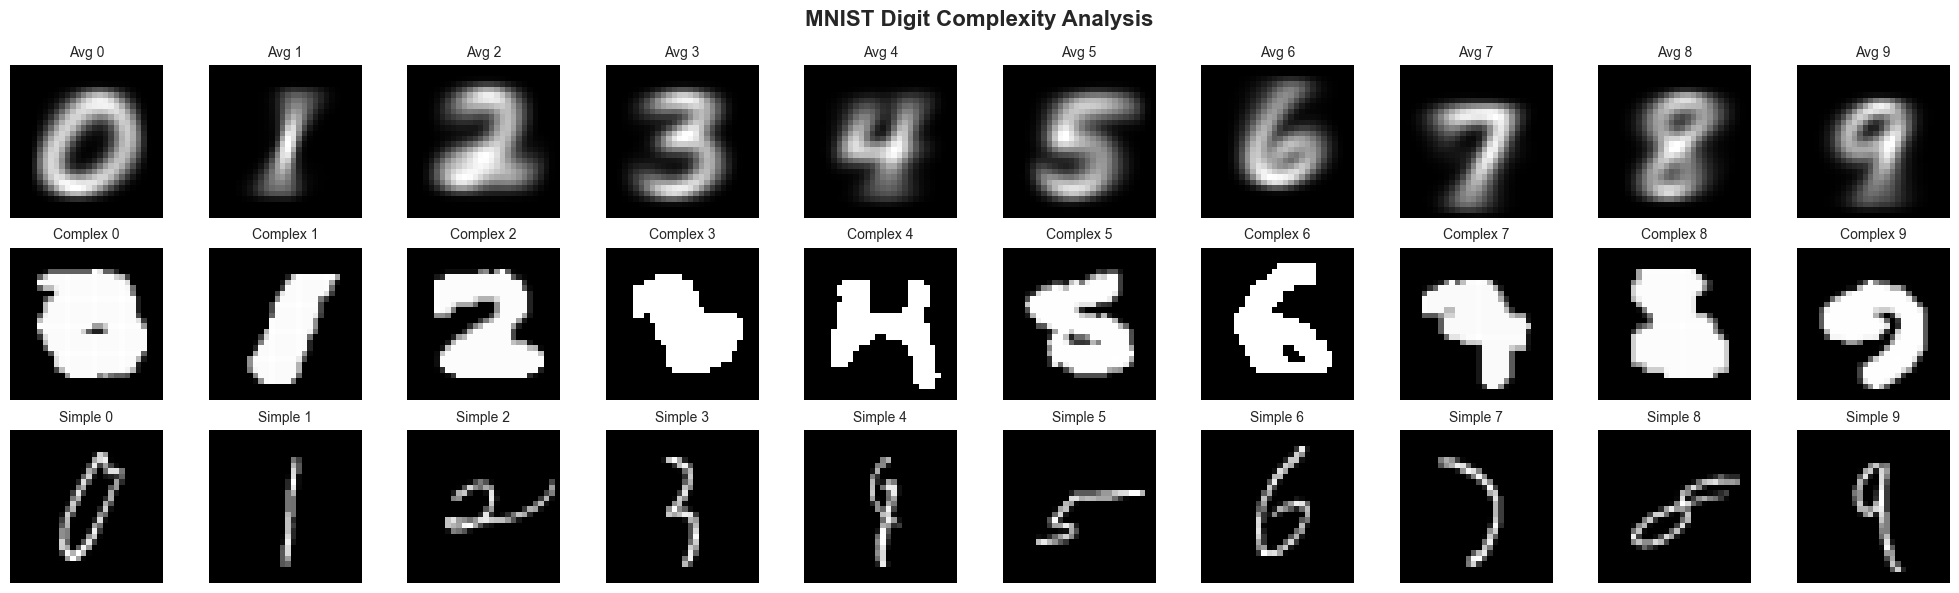


📊 Analyzing pixel importance...


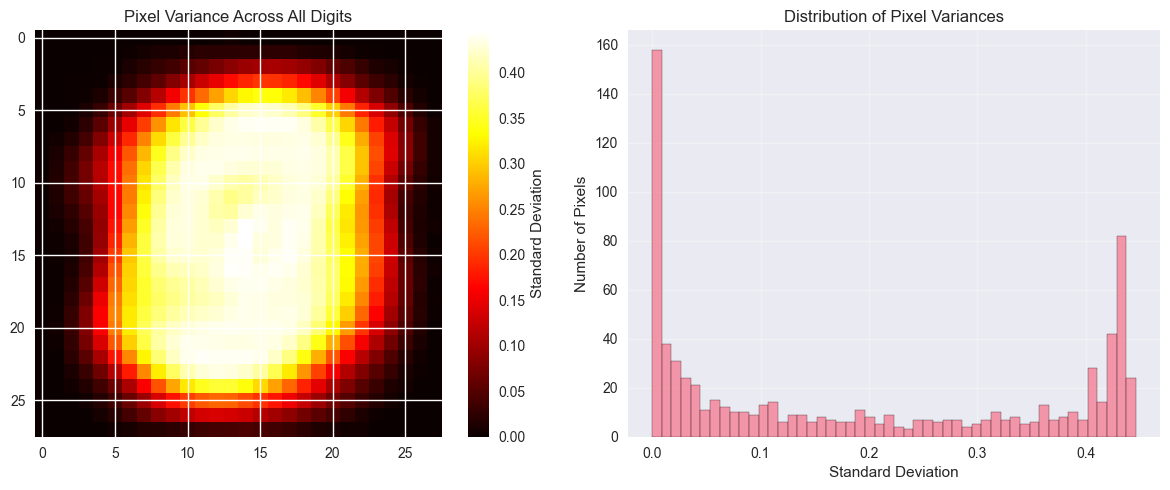


💾 Memory Analysis:
Original data size: 47,100,000 bytes
Normalized data size: 188,160,000 bytes
Flattened data size: 188,160,000 bytes
One-hot labels size: 4,800,000 bytes
Compression ratio: 0.2x
✅ Advanced data analysis completed!


In [6]:
# Advanced data analysis
print("🔍 Performing advanced data analysis...")

# 1. Analyze image complexity by calculating variance for each digit
digit_variance = []
digit_examples = []

for digit in range(10):
    digit_mask = y_train == digit
    digit_images = x_train_normalized[digit_mask]
    
    # Calculate variance for this digit class
    variance = np.var(digit_images.reshape(digit_images.shape[0], -1), axis=1)
    digit_variance.append(variance)
    
    # Find most and least complex examples
    most_complex_idx = np.argmax(variance)
    least_complex_idx = np.argmin(variance)
    digit_examples.append((digit_images[most_complex_idx], digit_images[least_complex_idx]))

# Plot complexity analysis
fig, axes = plt.subplots(3, 10, figsize=(20, 6))

# Row 1: Average digits
for digit in range(10):
    axes[0, digit].imshow(avg_digits[digit], cmap='gray')
    axes[0, digit].set_title(f'Avg {digit}', fontsize=10)
    axes[0, digit].axis('off')

# Row 2: Most complex examples
for digit in range(10):
    axes[1, digit].imshow(digit_examples[digit][0], cmap='gray')
    axes[1, digit].set_title(f'Complex {digit}', fontsize=10)
    axes[1, digit].axis('off')

# Row 3: Least complex examples
for digit in range(10):
    axes[2, digit].imshow(digit_examples[digit][1], cmap='gray')
    axes[2, digit].set_title(f'Simple {digit}', fontsize=10)
    axes[2, digit].axis('off')

plt.suptitle('MNIST Digit Complexity Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Analyze pixel importance
print("\n📊 Analyzing pixel importance...")

# Calculate standard deviation across all images for each pixel
pixel_std = np.std(x_train_normalized.reshape(-1, 784), axis=0).reshape(28, 28)

# Plot pixel importance heatmap
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(pixel_std, cmap='hot', interpolation='nearest')
plt.title('Pixel Variance Across All Digits')
plt.colorbar(label='Standard Deviation')

plt.subplot(1, 2, 2)
plt.hist(pixel_std.flatten(), bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Pixel Variances')
plt.xlabel('Standard Deviation')
plt.ylabel('Number of Pixels')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Memory and storage analysis
print(f"\n💾 Memory Analysis:")
print(f"Original data size: {x_train.nbytes + y_train.nbytes:,} bytes")
print(f"Normalized data size: {x_train_normalized.nbytes:,} bytes") 
print(f"Flattened data size: {x_train_flat.nbytes:,} bytes")
print(f"One-hot labels size: {y_train_onehot.nbytes:,} bytes")
print(f"Compression ratio: {x_train.nbytes / x_train_normalized.nbytes:.1f}x")

print("✅ Advanced data analysis completed!")
